In [3]:
# importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
import re

In [7]:
# cargar datos
df_abc = pd.read_csv('../files/hr_clean.csv')

## ANÁLISIS DE ATTRITION (Exploratorio + Interpretativo)

### 1. Distribución de Attrition

En este apartado se analiza la distribución de la variable Attrition con el objetivo de comprender el nivel de rotación de empleados en el conjunto de datos.

In [8]:
df_abc.columns

Index(['Unnamed: 0', 'age', 'attrition', 'business_travel', 'daily_rate',
       'department', 'distance_from_home', 'education', 'education_field',
       'employee_count', 'employee_number', 'environment_satisfaction',
       'gender', 'hourly_rate', 'job_involvement', 'job_level', 'job_role',
       'job_satisfaction', 'marital_status', 'monthly_income', 'monthly_rate',
       'num_companies_worked', 'over_time', 'percent_salary_hike',
       'performance_rating', 'relationship_satisfaction', 'stock_option_level',
       'total_working_years', 'training_times_last_year', 'work_life_balance',
       'years_at_company', 'years_in_current_role',
       'years_since_last_promotion', 'years_with_curr_manager'],
      dtype='object')

In [9]:
df_abc['attrition'].value_counts()

attrition
No     1236
Yes     238
Name: count, dtype: int64

In [10]:
df_abc['attrition'].value_counts(normalize=True) * 100

attrition
No     83.85346
Yes    16.14654
Name: proportion, dtype: float64

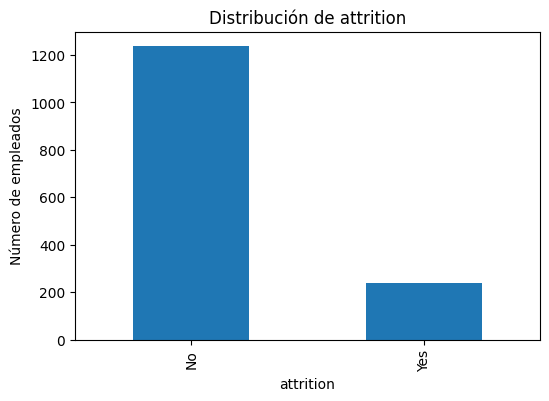

In [13]:
# Visualización

# Crear la figura (primero)
plt.figure(figsize=(6, 4))

# Dibujar el gráfico
df_abc['attrition'].value_counts().plot(kind='bar')

# Añadir títulos y etiquetas
plt.title('Distribución de attrition')
plt.xlabel('attrition')
plt.ylabel('Número de empleados')

# Guardar la figura
plt.savefig('../outputs/clean_distribucion_attrition.png', bbox_inches='tight')

# Mostrar el gráfico
plt.show()

### OBSERVACIONES sobre la DISTRIBUCION  de Attrition

La mayoría de los empleados del conjunto de datos continúa en la empresa. 
Aproximadamente el 83.85% de los registros corresponden a empleados que permanecen en la compañía, mientras que solo el 16.15% presentan Attrition.

Esto indica que el conjunto de datos está claramente desbalanceado, con una proporción significativamente mayor de empleados que no han dejado la empresa.
Este desbalance deberá tenerse en cuenta en los análisis posteriores, ya que puede influir en la interpretación de los resultados y en la identificación de patrones asociados a la rotación.

Este desbalance es habitual en datasets de recursos humanos, donde la rotación suele afectar a una minoría de empleados.

### 2. Attrition vs OverTime

En este apartado se analiza la relación entre la variable Attrition y la realización de horas extra (OverTime), con el objetivo de identificar posibles patrones asociados a la rotación de empleados.

In [14]:
# Tabla de Contingencia

pd.crosstab(df_abc['over_time'], df_abc['attrition'])

attrition,No,Yes
over_time,,
No,956,113
Yes,280,125


In [15]:
# Proporciones

pd.crosstab(
    df_abc['over_time'],
    df_abc['attrition'],
    normalize='index'
) * 100

attrition,No,Yes
over_time,,
No,89.429373,10.570627
Yes,69.135802,30.864198


<Figure size 600x400 with 0 Axes>

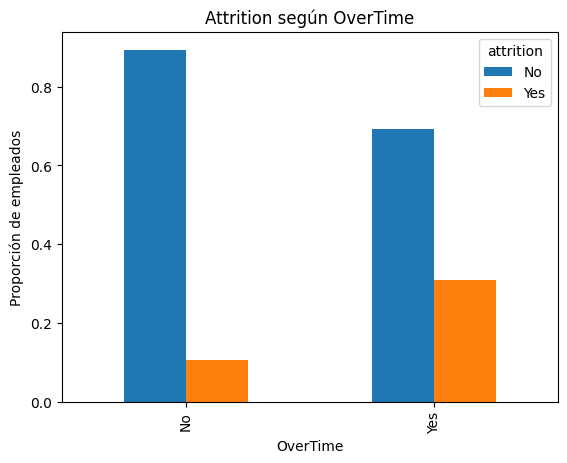

In [16]:
# Visualización

plt.figure(figsize=(6, 4))

pd.crosstab(
    df_abc['over_time'],
    df_abc['attrition'],
    normalize='index'
).plot(kind='bar')

plt.title('Attrition según OverTime')
plt.xlabel('OverTime')
plt.ylabel('Proporción de empleados')

plt.savefig('../outputs/clean_attrition_overtime.png', bbox_inches='tight')
plt.show()

### OBSERVACIONES ATTRITION VS OVER_TIME

Se observa que la proporción de empleados que presentan Attrition es significativamente mayor entre aquellos que realizan horas extra (aproximadamente un 31%) en comparación con los empleados que no realizan horas extra (alrededor del 10%).

Este patrón sugiere que la realización de horas extra podría estar asociada a una mayor rotación de empleados. No obstante, sería necesario analizar otras variables para confirmar esta relación y descartar posibles factores de confusión.

Este resultado es coherente con escenarios en los que una mayor carga de trabajo puede afectar al equilibrio entre la vida personal y laboral, lo que podría influir en la decisión de abandonar la empresa.

## 3. Attrition vs WorkLifeBalance

En este apartado se analiza la relación entre la variable Attrition y el nivel de equilibrio entre la vida personal y laboral (WorkLifeBalance), con el objetivo de identificar posibles patrones asociados a la rotación de empleados.

La variable WorkLifeBalance es una variable ordinal que representa distintos niveles de equilibrio entre vida personal y laboral, donde valores más altos indican una mejor percepción del equilibrio. WorkLifeBalance suele estar codificada como:

1 → Bad

2 → Good

3 → Better

4 → Best

In [ ]:
# Tabla de Contingencia

pd.crosstab(df_abc['work_life_balance'], df_abc['attrition'])

Attrition,No,Yes
WorkLifeBalance,,
1,55,25
2,286,58
3,769,128
4,126,27


In [17]:
# Proporciones

pd.crosstab(
    df_abc['work_life_balance'],
    df_abc['attrition'],
    normalize='index'
) * 100

attrition,No,Yes
work_life_balance,,
1,68.750000,31.250000
2,83.139535,16.860465
3,85.730212,14.269788
4,82.352941,17.647059


<Figure size 600x400 with 0 Axes>

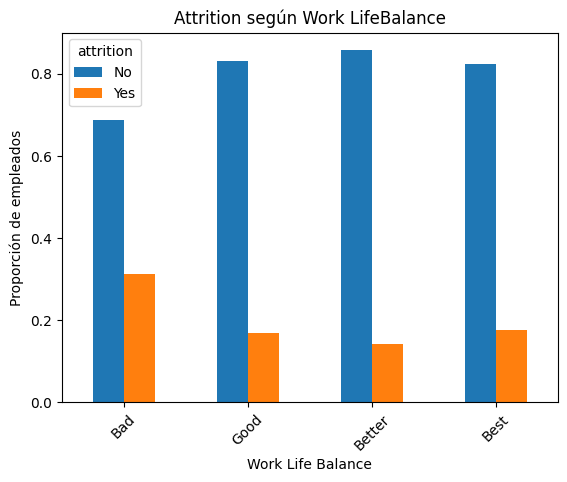

In [21]:
# Visualización

plt.figure(figsize=(6, 4))

pd.crosstab(
    df_abc['work_life_balance'],
    df_abc['attrition'],
    normalize='index').rename(index={1: 'Bad', 2: 'Good', 3: 'Better', 4: 'Best'}
).plot(kind='bar')

plt.title('Attrition según Work LifeBalance')
plt.xlabel('Work Life Balance')
plt.ylabel('Proporción de empleados')
plt.xticks(rotation=45)

plt.savefig('../outputs/clean_attrition_worklifebalance.png', bbox_inches='tight')
plt.show()

### OBSERVACIONES ATTRITION VS WORK_LIFE_BALANCE

Se observa que los empleados con el nivel más bajo de WorkLifeBalance (nivel 1) presentan la mayor proporción de Attrition, con aproximadamente un 31% de rotación.

A partir del nivel 2, la proporción de empleados que abandonan la empresa disminuye de forma notable y se mantiene relativamente estable en los niveles superiores. No obstante, el nivel más alto de WorkLifeBalance no muestra una reducción adicional clara respecto al nivel 3.

Estos resultados sugieren que un bajo equilibrio entre vida personal y laboral podría estar asociado a una mayor rotación de empleados, reforzando los hallazgos observados previamente en el análisis de horas extra.

Aunque se observa una tendencia general, la distribución desigual de empleados entre los distintos niveles de WorkLifeBalance podría influir en la estabilidad de las proporciones observadas.

## 4. Attrition vs JobSatisfaction

En este apartado se analiza la relación entre la variable Attrition y el nivel de satisfacción con el trabajo (JobSatisfaction), con el objetivo de identificar posibles patrones asociados a la rotación de empleados.

La variable JobSatisfaction es una variable ordinal en la que valores más altos representan un mayor nivel de satisfacción con el trabajo.

In [18]:
# Tabla de Contingencia

pd.crosstab(df_abc['job_satisfaction'], df_abc['attrition'])

attrition,No,Yes
job_satisfaction,,
1,222,64
2,229,46
3,381,77
4,404,51


In [19]:
# Proporciones

pd.crosstab(
    df_abc['job_satisfaction'],
    df_abc['attrition'],
    normalize='index'
) * 100

attrition,No,Yes
job_satisfaction,,
1,77.622378,22.377622
2,83.272727,16.727273
3,83.187773,16.812227
4,88.791209,11.208791


<Figure size 600x400 with 0 Axes>

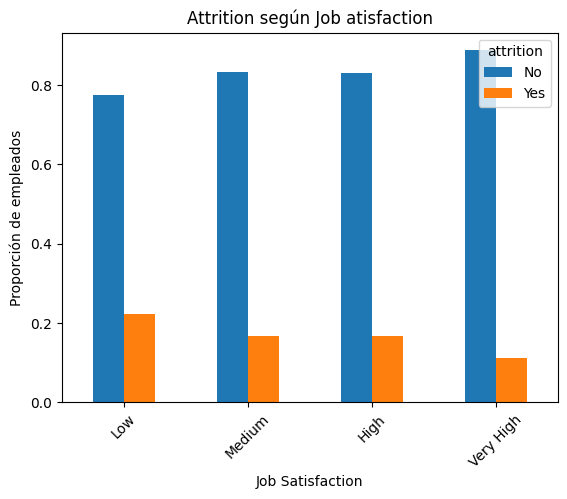

In [22]:
# Visualización

plt.figure(figsize=(6, 4))

pd.crosstab(
    df_abc['job_satisfaction'],
    df_abc['attrition'],
    normalize='index').rename(index={1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'}
).plot(kind='bar')

plt.title('Attrition según Job atisfaction')
plt.xlabel('Job Satisfaction')
plt.ylabel('Proporción de empleados')
plt.xticks(rotation=45)

plt.savefig('../outputs/clean_attrition_jobsatisfaction.png', bbox_inches='tight')
plt.show()

### OBSERVACIONES ATTRITION VS JOB_SATISFACTION

Se observa que los niveles más bajos de JobSatisfaction presentan una mayor proporción de empleados con Attrition. En concreto, los empleados con el nivel más bajo de satisfacción muestran una tasa de rotación superior al 22%.

A medida que aumenta la satisfacción con el trabajo, la proporción de empleados que abandonan la empresa disminuye de forma progresiva, alcanzando su valor más bajo en el nivel más alto de JobSatisfaction.

Este patrón refuerza la relación observada previamente entre carga de trabajo, equilibrio entre vida personal y laboral, y satisfacción laboral, sugiriendo que estos factores podrían estar asociados a la retención de empleados.

## RESUMEN de HALLAZGOS PRINCIPALES sobre ATTRITION

A lo largo del análisis exploratorio se han identificado varios patrones relevantes relacionados con la rotación de empleados (Attrition).

En primer lugar, se observa que el conjunto de datos presenta un claro desbalance, con una proporción significativamente mayor de empleados que permanecen en la empresa frente a aquellos que la abandonan. Este aspecto debe tenerse en cuenta en la interpretación de los resultados.

El análisis de la variable OverTime muestra una diferencia notable en la rotación de empleados. Aquellos que realizan horas extra presentan una tasa de Attrition considerablemente superior en comparación con los empleados que no realizan horas extra, lo que sugiere una posible relación entre la carga de trabajo y la decisión de abandonar la empresa.

En línea con este resultado, los empleados con un bajo nivel de equilibrio entre vida personal y laboral (WorkLifeBalance) muestran una mayor proporción de Attrition. A medida que mejora la percepción del equilibrio, la rotación tiende a disminuir, aunque no de forma estrictamente lineal en los niveles más altos.

Finalmente, el análisis de JobSatisfaction revela un patrón claro: los empleados con menor satisfacción laboral presentan mayores tasas de rotación, mientras que aquellos con niveles altos de satisfacción tienden a permanecer en la empresa con mayor frecuencia.

En conjunto, estos resultados sugieren que factores relacionados con la carga de trabajo, el equilibrio personal y la satisfacción laboral podrían estar asociados a la retención de empleados, y constituyen un punto de partida sólido para análisis posteriores más profundos.

## BONUS 
### ATTRITION vs MONTHLYICOME

En este apartado se analiza la relación entre la variable Attrition y el ingreso mensual (MonthlyIncome), con el objetivo de identificar posibles diferencias en los niveles salariales entre empleados que abandonan la empresa y aquellos que permanecen en ella.

In [23]:
# Estadística descriptiva (variable numérica)

df_abc.groupby('attrition')['monthly_income'].describe()

,count,mean,std,min,25%,50%,75%,max
attrition,,,,,,,,
No,1236.0,6817.105987,4797.278041,1051.0,3227.0,5159.0,8800.5,19999.0
Yes,238.0,4743.823529,3597.670833,1009.0,2368.5,3343.5,5801.0,19859.0


<Figure size 600x400 with 0 Axes>

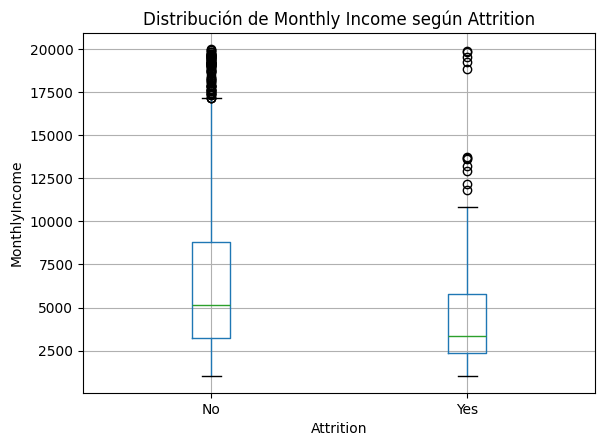

In [26]:
# Visualización

plt.figure(figsize=(6, 4))

df_abc.boxplot(
    column='monthly_income',
    by='attrition'
)

plt.title('Distribución de Monthly Income según Attrition')
plt.suptitle('')  # elimina el título automático
plt.xlabel('Attrition')
plt.ylabel('MonthlyIncome')

plt.savefig('../outputs/attrition_monthlyincome.png', bbox_inches='tight')
plt.show()


### OBSERVACIONES ESTADÍSTICA DESCRIPTIVA

Se observan diferencias claras en la distribución del ingreso mensual entre los empleados que presentan Attrition y aquellos que permanecen en la empresa. Tanto la media como la mediana del ingreso mensual son significativamente más bajas en el grupo de empleados que abandonan la empresa.

El boxplot muestra además una mayor dispersión salarial y un mayor número de valores extremos en el grupo de empleados que no presentan Attrition, lo que podría estar relacionado con la presencia de perfiles con mayor antigüedad o nivel jerárquico.

Aunque existe solapamiento entre ambos grupos, los resultados sugieren que niveles salariales más altos podrían estar asociados a una mayor retención de empleados, si bien este factor no parece actuar de forma aislada.

Dado el carácter exploratorio del análisis, sería interesante analizar esta variable en combinación con el nivel del puesto o la antigüedad en la empresa para entender mejor su efecto.